In [40]:
import pandas as pd
pd.options.display.max_rows = 1000

import pickle

import numpy as np

from geopy.geocoders import Nominatim

import re
import string

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

In [2]:
def plt_vals(df):
    df.value_counts().plot(kind='bar');

In [3]:
with open('../data/interim/02_cleaned.pkl', 'rb') as picklefile:
    df_listings = pickle.load(picklefile)

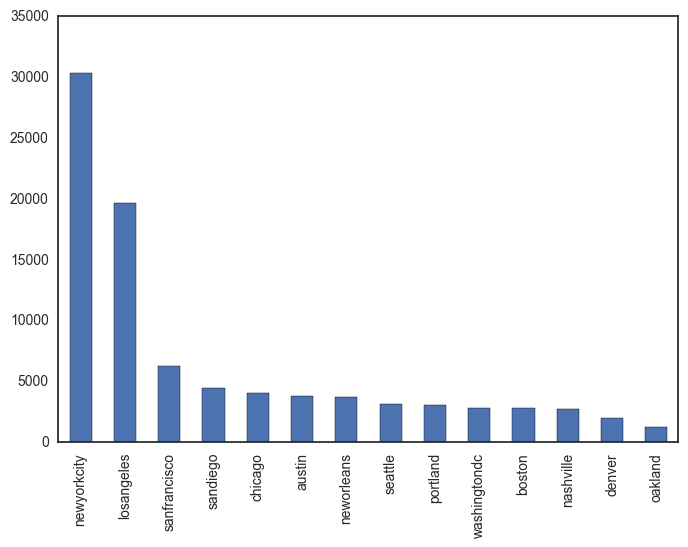

In [4]:
plt_vals(df_listings['city'])

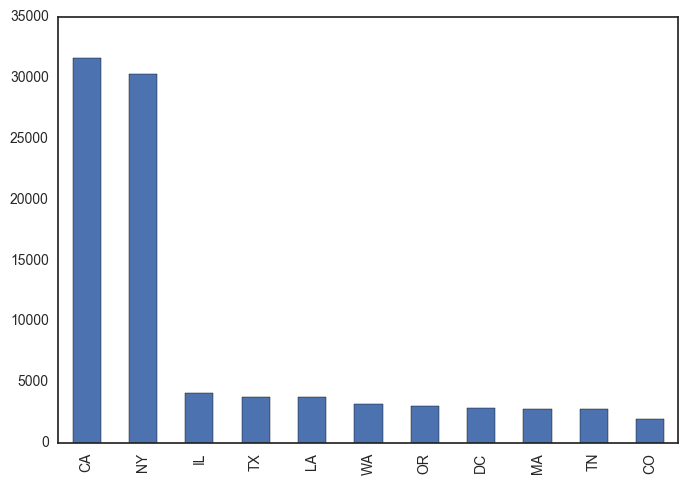

In [5]:
plt_vals(df_listings['state'])

In [6]:
df_listings['property_type'].value_counts()

Apartment          53956
House              27542
Condominium         2264
Loft                1881
Townhouse           1481
Bed & Breakfast      791
Other                651
Bungalow             510
Dorm                 215
Cabin                175
Villa                164
Camper/RV            156
Boat                  77
Guesthouse            71
Tent                  57
Treehouse             21
Entire Floor          21
Castle                18
Chalet                14
Hut                    8
Earth House            7
Yurt                   6
Cave                   5
Tipi                   4
Plane                  3
Boutique hotel         2
Timeshare              1
Train                  1
Hostel                 1
Island                 1
Lighthouse             1
Name: property_type, dtype: int64

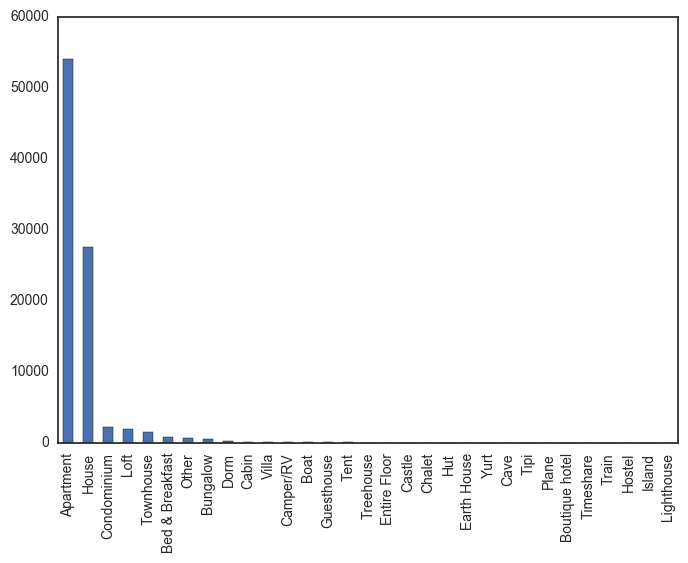

In [7]:
plt_vals(df_listings['property_type'])

In [8]:
unique_props = df_listings.groupby(['property_type', 'city'], as_index=False).count()[['property_type', 'city', 'id']]

In [9]:
#to answer the question: what percentage of all apartment listings are in nyc?
city_by_prop_type = df_listings.groupby(['property_type', 'city']).agg({'id': 'sum'})
pcts_by_prop_type = city_by_prop_type.groupby(level=0).apply(lambda x: x / float(x.sum()))
pcts_by_prop_type = pcts_by_prop_type.reset_index()
print pcts_by_prop_type[pcts_by_prop_type['property_type']=='Apartment'].sum()['id']
pcts_by_prop_type.head(20)

1.0


,property_type,city,id
0,Apartment,austin,0.014205
1,Apartment,boston,0.038470
2,Apartment,chicago,0.040147
3,Apartment,denver,0.013412
4,Apartment,losangeles,0.181096
5,Apartment,nashville,0.012163
6,Apartment,neworleans,0.028936
7,Apartment,newyorkcity,0.526807
8,Apartment,oakland,0.007006
9,Apartment,portland,0.013087


In [10]:
#to answer the question: what percentage of nyc listings are apartments?
prop_types_by_city = df_listings.groupby(['city', 'property_type']).agg({'id': 'sum'})
pcts_by_city = prop_types_by_city.groupby(level=0).apply(lambda x: x / float(x.sum()))
pcts_by_city = pcts_by_city.reset_index()
print pcts_by_city[pcts_by_city['city']=='austin'].sum()['id']
pcts_by_city.head(20)

1.0


,city,property_type,id
0,austin,Apartment,0.359199
1,austin,Bed & Breakfast,0.002958
2,austin,Boat,0.000157
3,austin,Bungalow,0.005117
4,austin,Cabin,0.003167
5,austin,Camper/RV,0.007562
6,austin,Chalet,0.000366
7,austin,Condominium,0.027050
8,austin,Earth House,0.000359
9,austin,House,0.558827


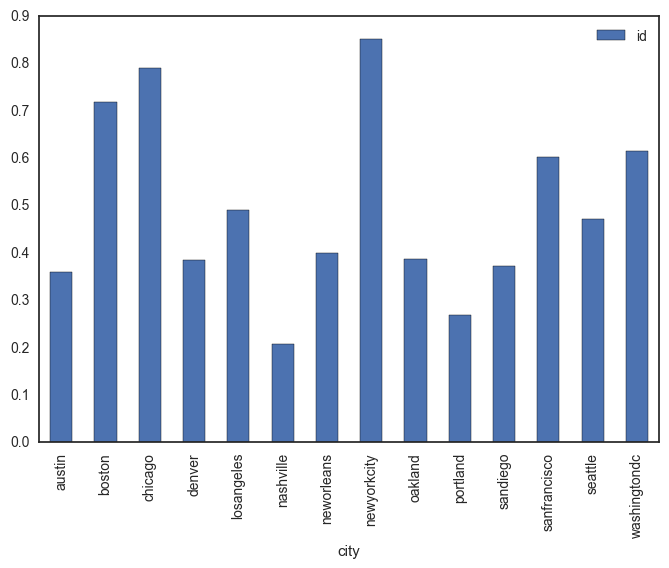

In [11]:
#what percentage of listings in a city are apartments?
#nyc = almost 90% of listings are apartments
pcts_by_city[pcts_by_city['property_type']=='Apartment'].plot(x='city', kind='bar');

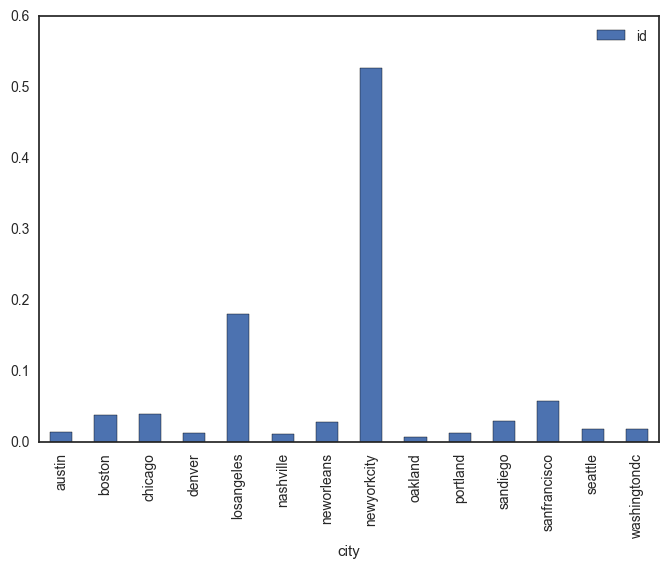

In [12]:
#what percentage of apartment listings are in a given city?
#nyc = over 50% of all apartment listings are in nyc
pcts_by_prop_type[pcts_by_prop_type['property_type']=='Apartment'].plot(x='city', kind='bar');

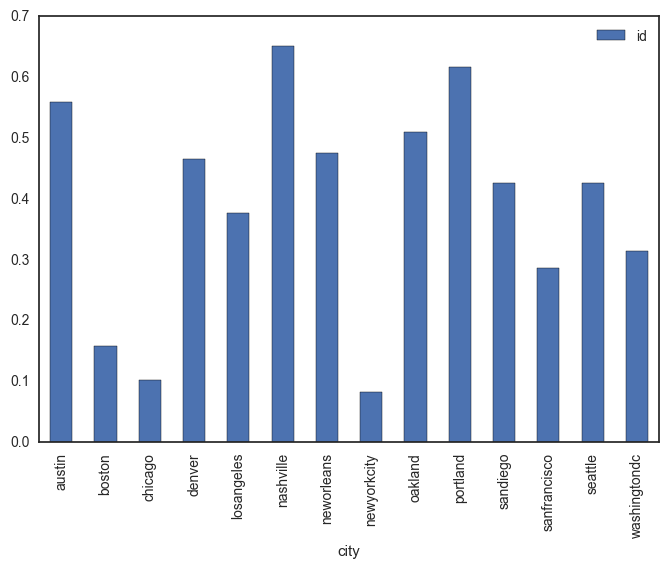

In [13]:
#what percentage of listings in a city are houses?
#santacruz = 70% of listings are houses
pcts_by_city[pcts_by_city['property_type']=='House'].plot(x='city', kind='bar');

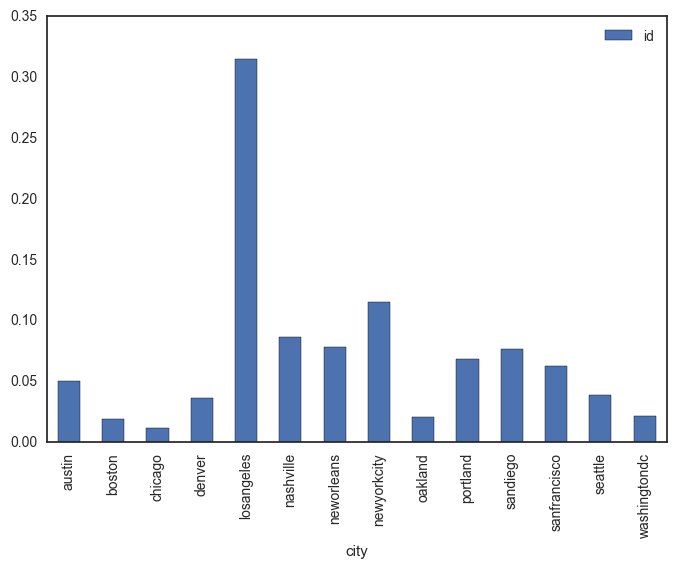

In [14]:
#what percentage of house listings are in a given city?
#la = over 30% of all house listings are in la
pcts_by_prop_type[pcts_by_prop_type['property_type']=='House'].plot(x='city', kind='bar');

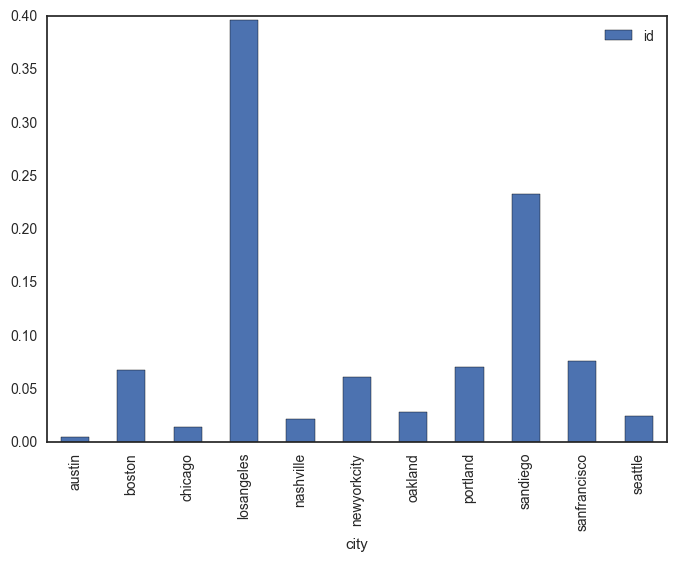

In [15]:
#what percentage of boat listings are in a given city?
#la = over 30% of all boat listings are in la
pcts_by_prop_type[pcts_by_prop_type['property_type']=='Boat'].plot(x='city', kind='bar');

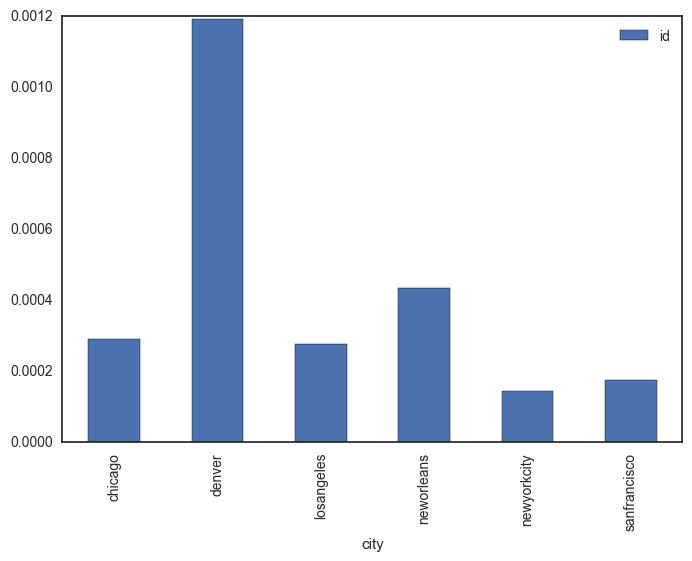

In [16]:
#what percentage of listings in a city are castles?
#denver = 2% of listings are castles
pcts_by_city[pcts_by_city['property_type']=='Castle'].plot(x='city', kind='bar');

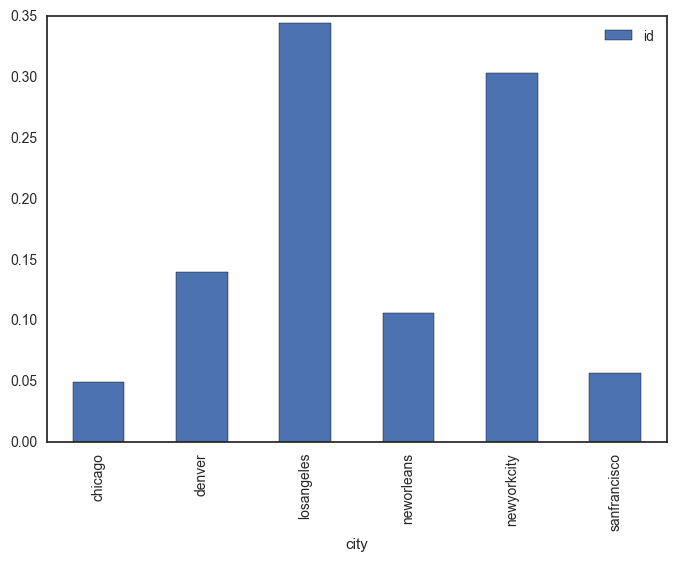

In [17]:
#what percentage of castle listings are in a given city?
#la & sd = over 50% of all castle listings are in la and sd
pcts_by_prop_type[pcts_by_prop_type['property_type']=='Castle'].plot(x='city', kind='bar');

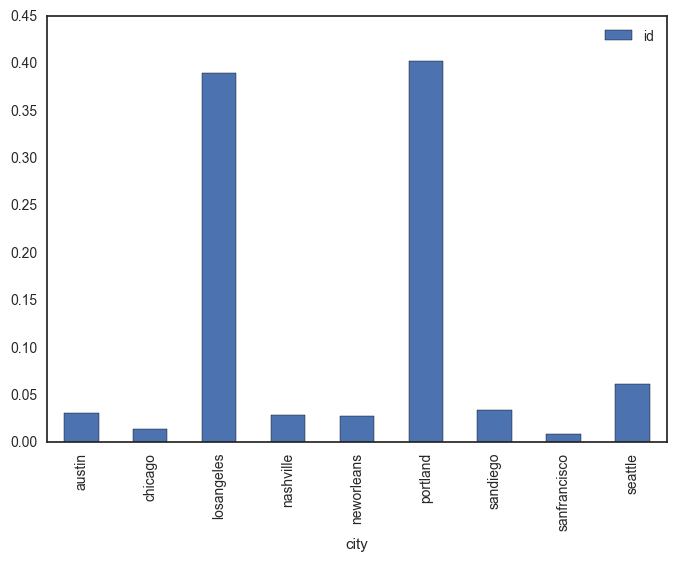

In [18]:
#what percentage of tent listings are in a given city?
#la & portland = over 70% of all tent listings are in la and portland
pcts_by_prop_type[pcts_by_prop_type['property_type']=='Tent'].plot(x='city', kind='bar');

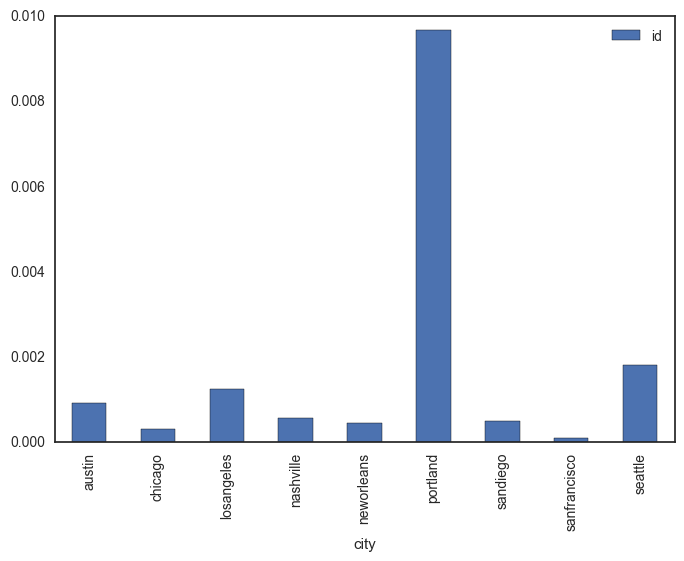

In [19]:
#what percentage of listings in a city are tents?
#portland = 0.08% of listings are tents
pcts_by_city[pcts_by_city['property_type']=='Tent'].plot(x='city', kind='bar');

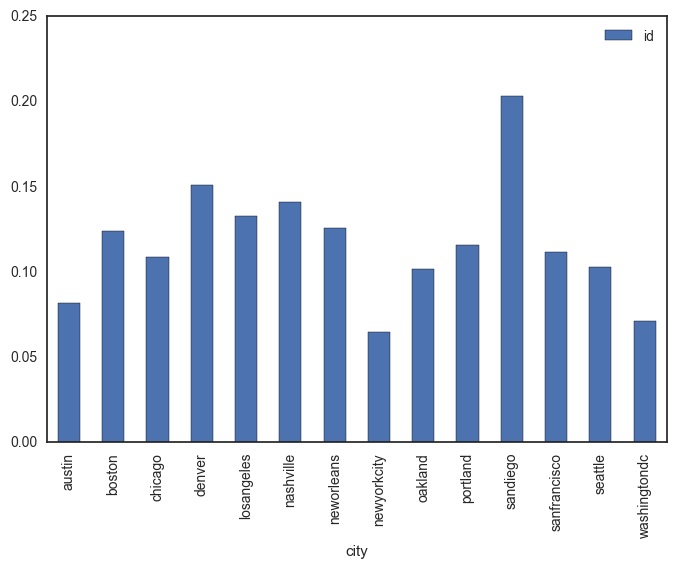

In [20]:
#what percentage of a city's listings are not apartments or houses?
no_apt_house = pcts_by_city[pcts_by_city['property_type']!='Apartment']
no_apt_house = no_apt_house[no_apt_house['property_type']!='House']
no_apt_house.groupby('city').sum().plot(kind='bar');

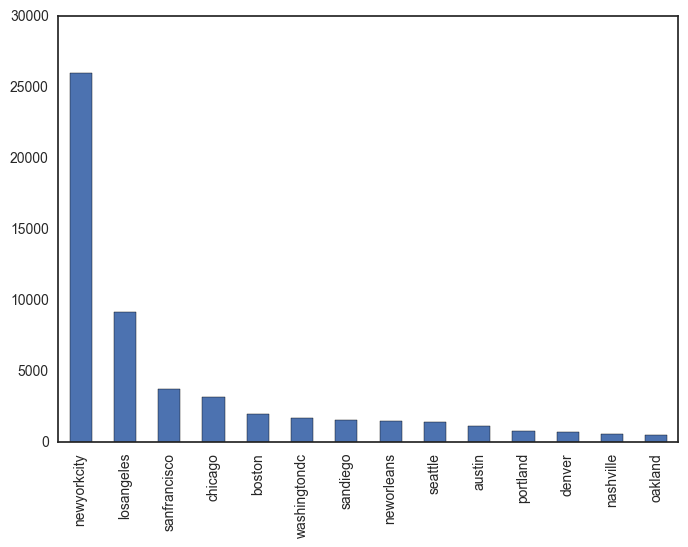

In [21]:
plt_vals(df_listings[df_listings['property_type']=='Apartment']['city'])

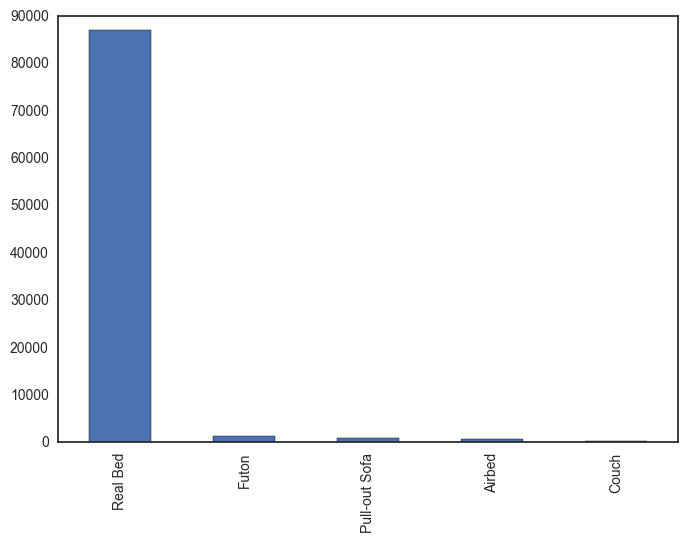

In [22]:
plt_vals(df_listings['bed_type'])

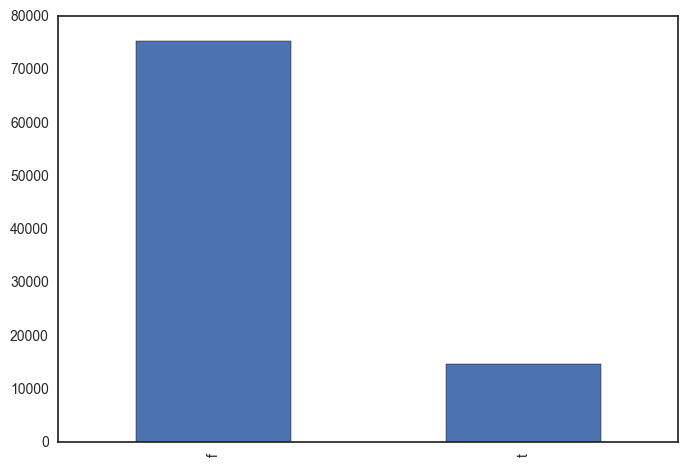

In [23]:
plt_vals(df_listings['host_is_superhost'])

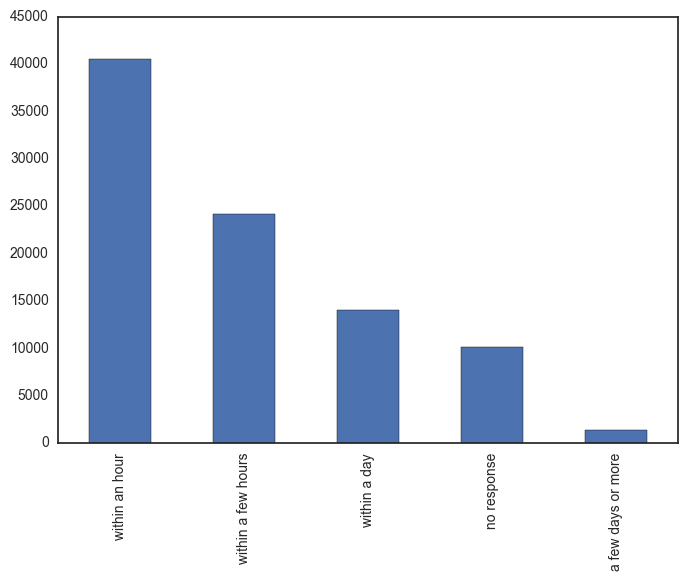

In [24]:
plt_vals(df_listings['host_response_time'])

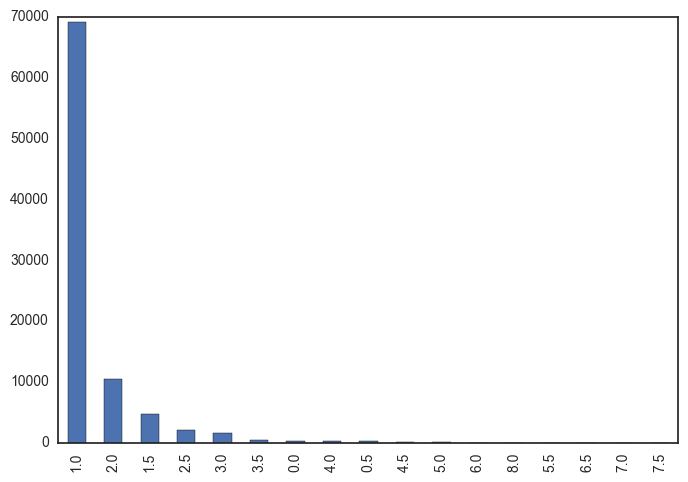

In [25]:
plt_vals(df_listings['bathrooms'])

In [26]:
#to compare cancelaltion policy distributions across cities
cancel_by_city = df_listings.groupby(['city', 'cancellation_policy']).agg({'id': 'sum'})
pcts_by_city = cancel_by_city.groupby(level=0).apply(lambda x: x / float(x.sum()))
pcts_by_city = pcts_by_city.reset_index()
print pcts_by_city[pcts_by_city['city']=='austin'].sum()['id']
pcts_by_city.head(20)

1.0


,city,cancellation_policy,id
0,austin,flexible,0.330995
1,austin,moderate,0.266522
2,austin,no_refunds,0.000005
3,austin,strict,0.402141
4,austin,super_strict_30,0.000338
5,boston,flexible,0.276791
6,boston,moderate,0.277918
7,boston,strict,0.439214
8,boston,super_strict_30,0.006078
9,chicago,flexible,0.396920


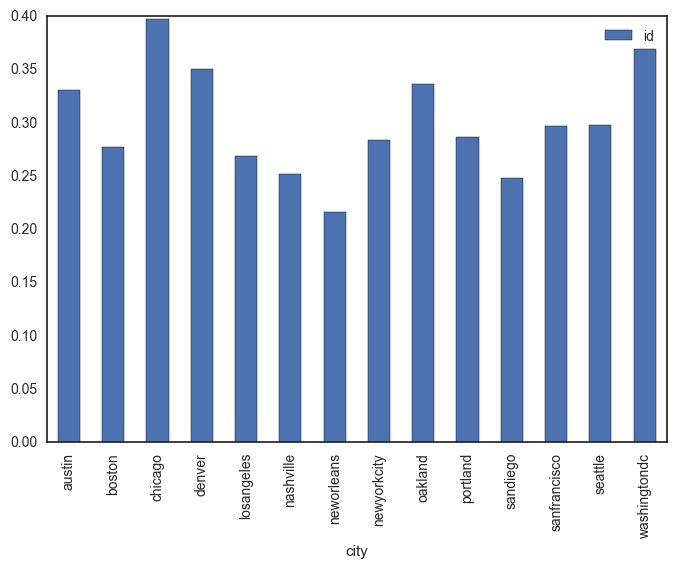

In [27]:
pcts_by_city[pcts_by_city['cancellation_policy']=='flexible'].plot(x='city', kind='bar');

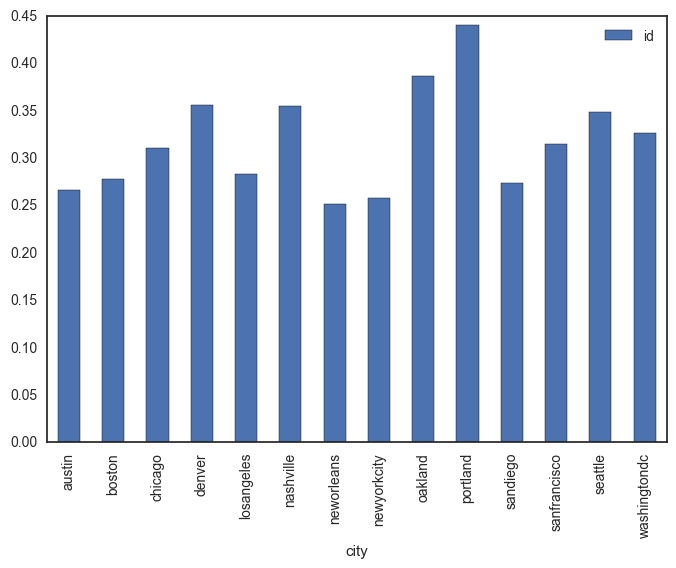

In [28]:
pcts_by_city[pcts_by_city['cancellation_policy']=='moderate'].plot(x='city', kind='bar');

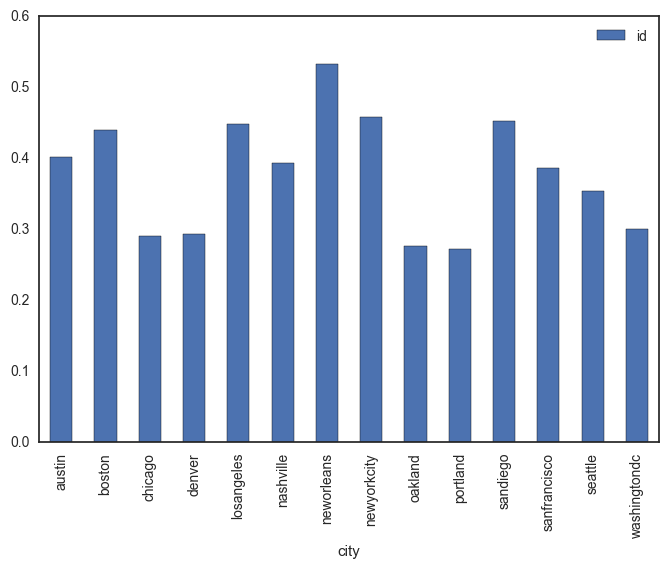

In [29]:
pcts_by_city[pcts_by_city['cancellation_policy']=='strict'].plot(x='city', kind='bar');

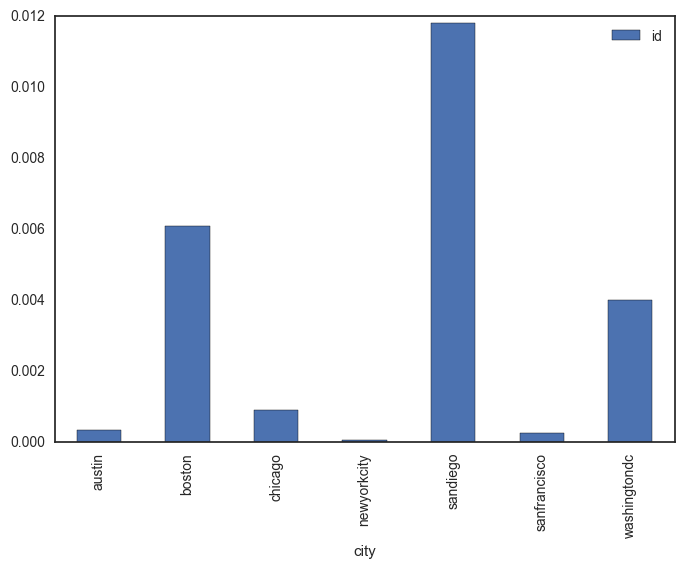

In [30]:
pcts_by_city[pcts_by_city['cancellation_policy']=='super_strict_30'].plot(x='city', kind='bar');

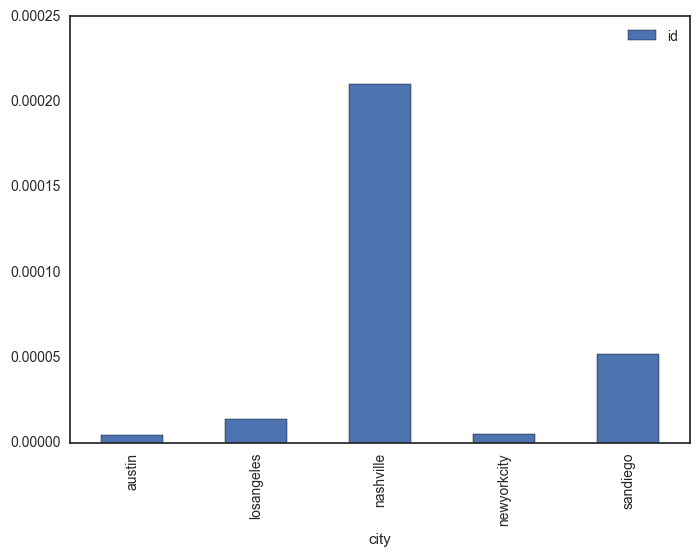

In [31]:
pcts_by_city[pcts_by_city['cancellation_policy']=='no_refunds'].plot(x='city', kind='bar');

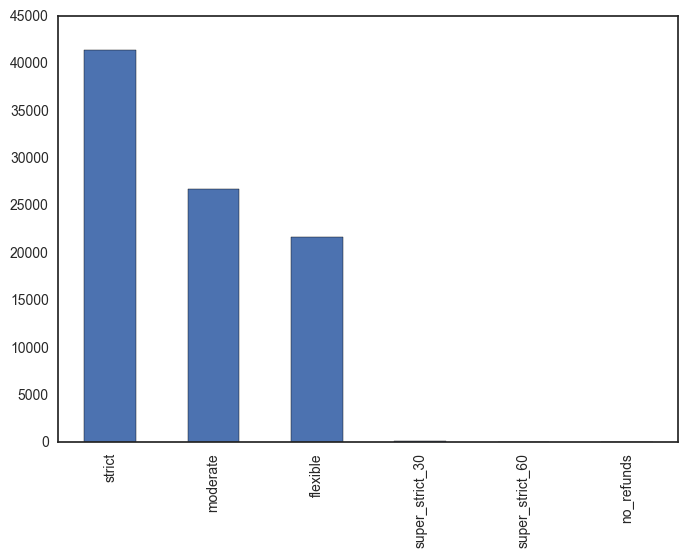

In [32]:
plt_vals(df_listings['cancellation_policy'])

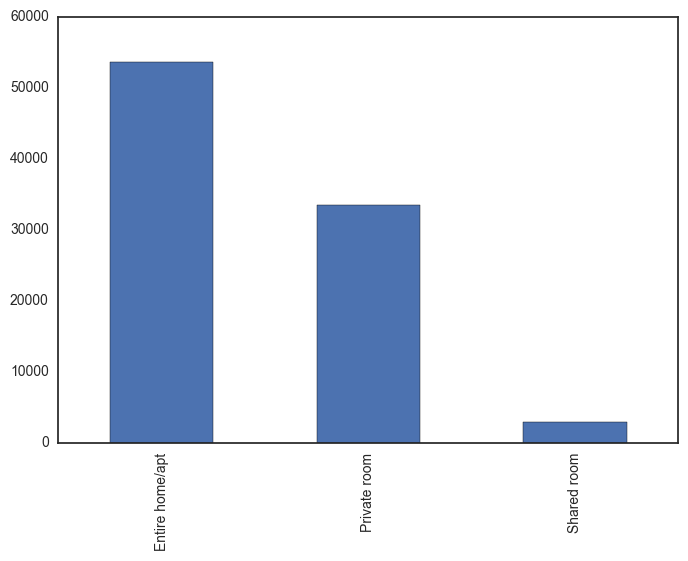

In [33]:
plt_vals(df_listings['room_type'])

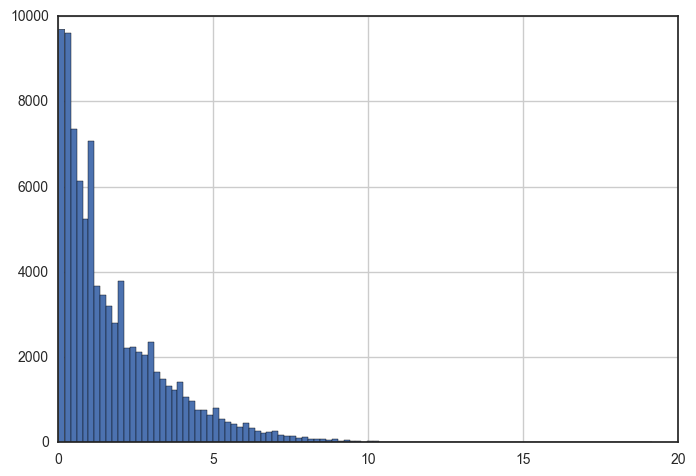

In [34]:
df_listings['reviews_per_month'].hist(bins=100);

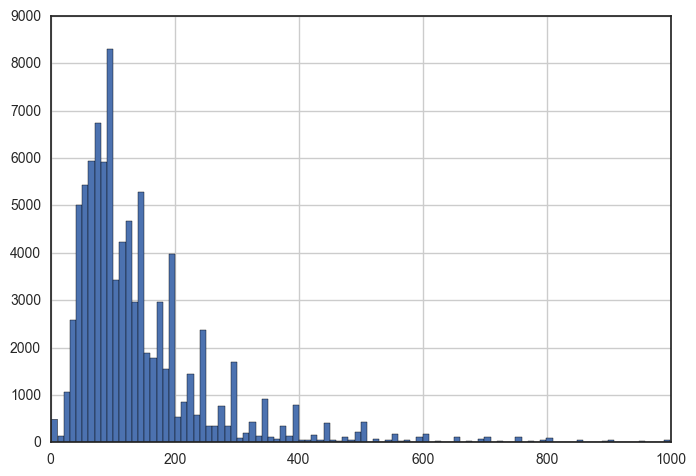

In [35]:
df_listings['price'].hist(bins=100);

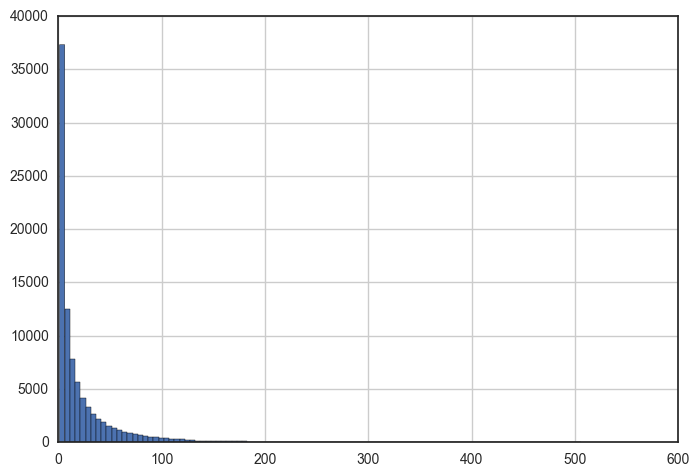

In [36]:
df_listings['number_of_reviews'].hist(bins=100);

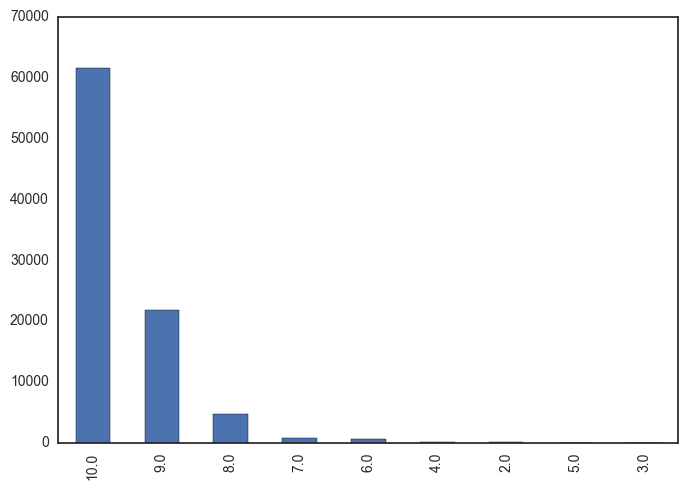

In [37]:
plt_vals(df_listings['review_scores_accuracy'])

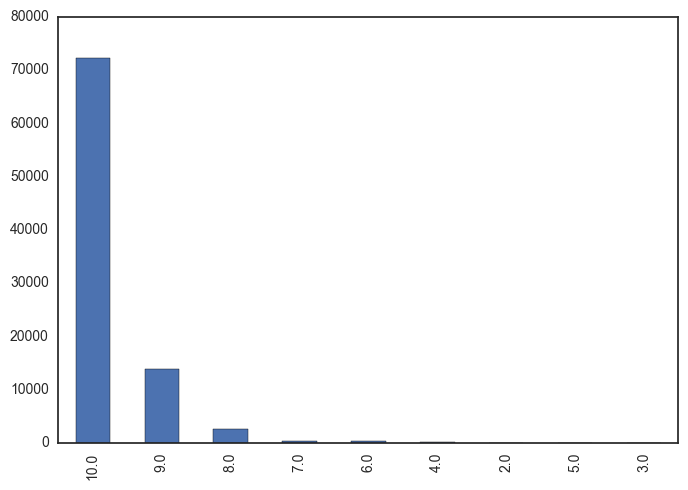

In [38]:
plt_vals(df_listings['review_scores_checkin'])

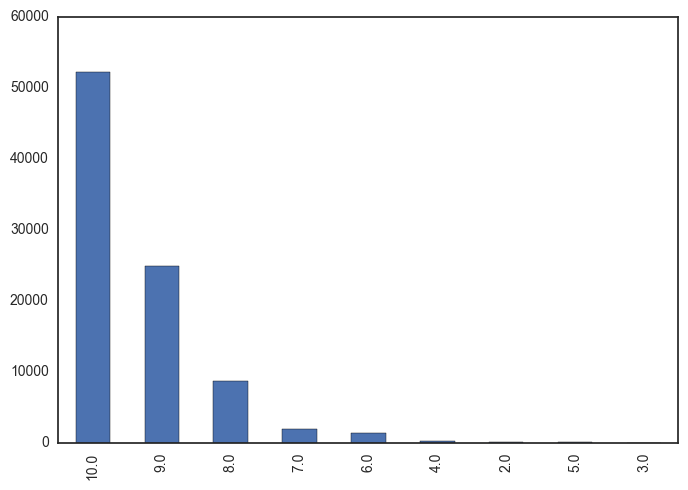

In [39]:
plt_vals(df_listings['review_scores_cleanliness'])

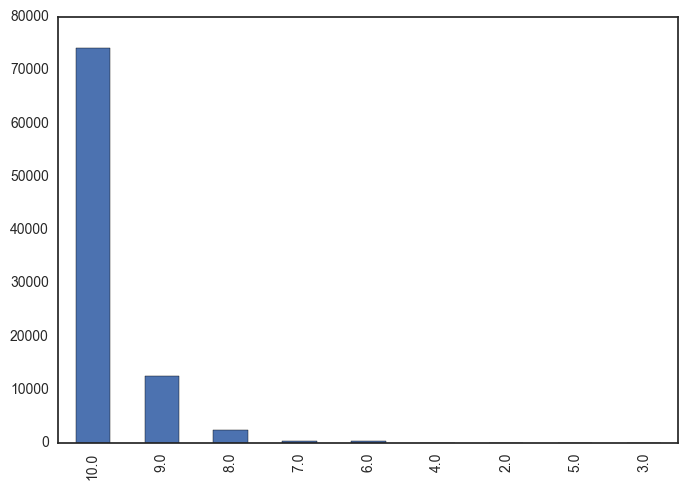

In [40]:
plt_vals(df_listings['review_scores_communication'])

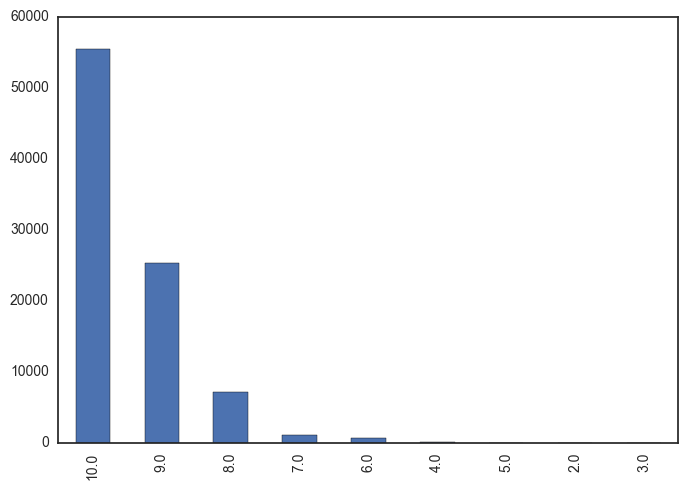

In [41]:
plt_vals(df_listings['review_scores_location'])

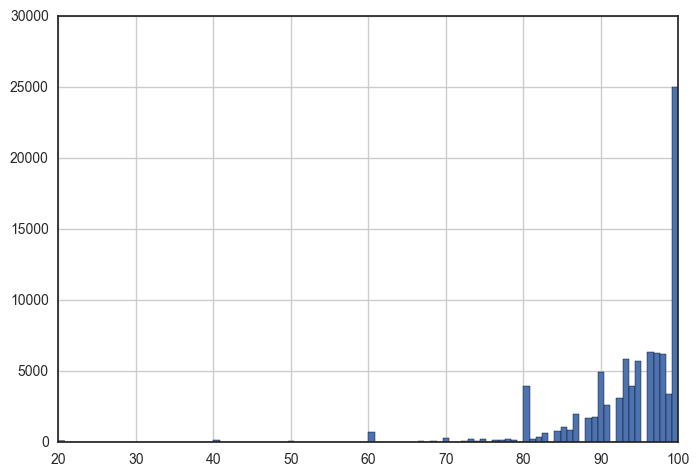

In [42]:
df_listings['review_scores_rating'].hist(bins=100);

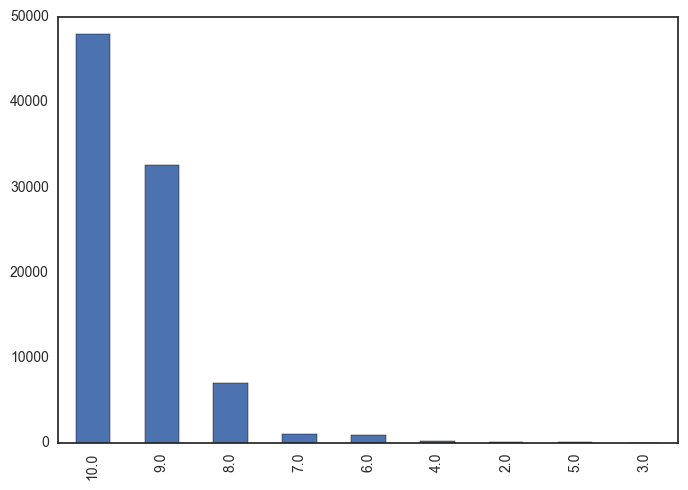

In [43]:
plt_vals(df_listings['review_scores_value'])

In [44]:
score_cols = []
for column in df_listings.columns:
    if 'scores' in column:
        score_cols.append(column)

In [45]:
df_mean_scores = df_listings[['city'] + score_cols].groupby('city').mean()

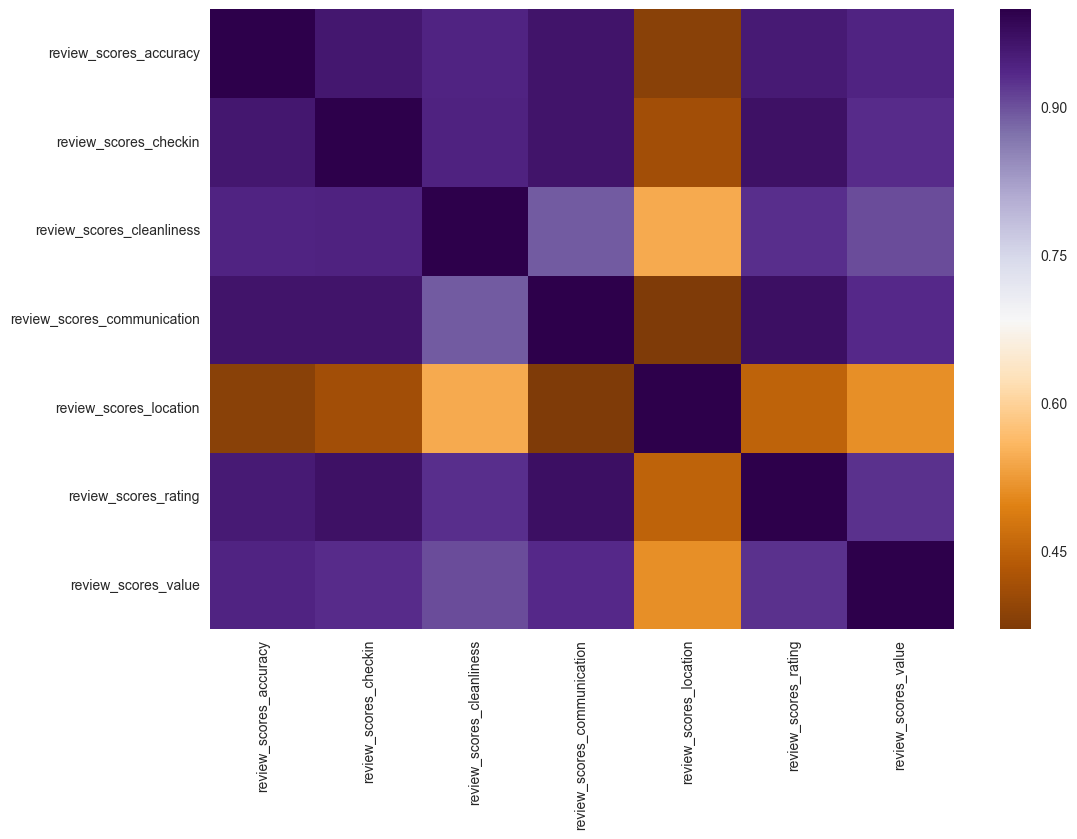

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_mean_scores.corr(), ax=ax, cmap="PuOr");

In [76]:
#create csv for d3 visualization

In [119]:
df_city_totals = df_listings.groupby(['city']).count()[['id']]

cities = {'austin': 'Austin, TX',
          'boston': 'Boston, MA',
          'chicago': 'Chicago, IL',
          'denver': 'Denver, CO',
          'losangeles': 'Los Angeles, CA',
          'nashville': 'Nasville, TN', 
          'neworleans': 'New Orleans',
          'newyorkcity': 'New York, NY', 
          'oakland' : 'Oakland, CA', 
          'portland': 'Portland, OR', 
          'sandiego': 'San Diego, CA', 
          'sanfrancisco': 'San Francisco, CA', 
          'seattle': 'Seattle, WA', 
          'washingtondc': 'Washington, DC'}

df_cities = pd.DataFrame.from_dict(cities, orient='index')

In [120]:
df_city_totals = df_cities.merge(df_city_totals, left_index=True, right_index=True).reset_index()
df_city_totals.columns = ['city_index', 'city_proper', 'total_listings']

In [121]:
df_city_totals.head()

,city_index,city_proper,total_listings
0,austin,"Austin, TX",3766
1,boston,"Boston, MA",2782
2,chicago,"Chicago, IL",4070
3,denver,"Denver, CO",1990
4,losangeles,"Los Angeles, CA",19609


In [122]:
df_city_totals['lat'] = 0
df_city_totals['lng'] = 0

In [123]:
geolocator = Nominatim()
for i, values in df_city_totals.iterrows():
    city = values[1]
    location = geolocator.geocode(city)
    lat = location.latitude
    lng = location.longitude
    df_city_totals.iloc[i, 3] = lat
    df_city_totals.iloc[i, 4] = lng

In [124]:
df_property_types = df_listings.groupby(['city', 'property_type']).size().unstack().reset_index().fillna(0)
df_property_types.columns = [s.encode('utf-8').lower().replace(" ", "").replace("/", "") for s in df_property_types.columns]

In [126]:
df_city_totals = df_city_totals.merge(df_property_types, left_on='city_index', right_on='city')

In [127]:
df_city_totals.drop(['city_index', 'city'], axis=1, inplace=True)

In [128]:
df_city_totals.to_csv('../reports/viz/data/city_totals.csv')